In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from PIL import Image, ImageTk
import tkinter as tk
from tkinter import filedialog, messagebox


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Tensorflow CUDA warnings will not be shown here
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

print("TensorFlow version is:", tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization

print("Modules loaded")
print("----->  Let's go  :)")

TensorFlow version is: 2.15.0
Modules loaded
----->  Let's go  :)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/chest_xray/train'


Mounted at /content/drive


In [ ]:
# Train dataset
train_path="/content/drive/MyDrive/chest_xray/train"
image_pathes=[]
labels=[]

files=os.listdir(train_path)
for file in files:
    file_path=os.path.join(train_path,file)
    images=os.listdir(file_path)
    for image in images:
        image_path=os.path.join(file_path,image)
        image_pathes.append(image_path)
        labels.append(file)

fseries=pd.Series(image_pathes, name="image_pathes")
lseries=pd.Series(labels,name="labels")
train_df=pd.concat([fseries,lseries],axis=1)
# Test dataset
test_path="/content/drive/MyDrive/chest_xray/test"
image_pathes=[]
labels=[]
files=os.listdir(test_path)
for file in files:
    file_bath=os.path.join(test_path,file)
    images=os.listdir(file_bath)
    for image in images:
        image_bath=os.path.join(file_bath , image)
        image_pathes.append(image_bath)
        labels.append(file)

Fseries =pd.Series(image_pathes,name="image_pathes")
lseries=pd.Series(labels,name="labels")

test_df=pd.concat([Fseries,lseries],axis=1)
#validaion datset
val_path="/content/drive/MyDrive/chest_xray/val"
image_pathes=[]
labels=[]

files=os.listdir(val_path)
for file in files:
    file_path=os.path.join(train_path,file)
    images=os.listdir(file_path)
    for image in images:
        image_path=os.path.join(file_path,image)
        image_pathes.append(image_path)
        labels.append(file)

fseries=pd.Series(image_pathes, name="image_pathes")
lseries=pd.Series(labels,name="labels")
valid_df=pd.concat([fseries,lseries],axis=1)

In [ ]:
# Define ImageDataGenerator
datagen = ImageDataGenerator()

# Define batch size and image size
batch_size = 32
image_size = (150, 150)

In [ ]:
train_path = "/content/drive/MyDrive/chest_xray/train"
test_path = "/content/drive/MyDrive/chest_xray/test"
val_path = "/content/drive/MyDrive/chest_xray/val"

In [ ]:
# Function to create data generators from DataFrame
def create_datagen(df, directory):
    return datagen.flow_from_dataframe(
        dataframe=df,
        directory=directory,
        x_col="image_pathes",
        y_col="labels",
        target_size=image_size,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="rgb",
        shuffle=True
    )

# Create data generators for training, testing, and validation datasets
train_generator = create_datagen(train_df, train_path)
test_generator = create_datagen(test_df, test_path)
valid_generator = create_datagen(valid_df, val_path)

Found 5211 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.
Found 5211 validated image filenames belonging to 2 classes.


In [ ]:

# Define ----> ImageDataGenerator
datagen = ImageDataGenerator()

# Define batch size and image size
batch_size = 32
image_size = (150, 150)

# Define paths ----> datasets
train_path = "/content/drive/MyDrive/chest_xray/train"
test_path = "/content/drive/MyDrive/chest_xray/test"
val_path = "/content/drive/MyDrive/chest_xray/val"

# Function ---> data generators from DataFrame
def create_datagen(df, directory):
    return datagen.flow_from_dataframe(
        dataframe=df,
        directory=directory,
        x_col="image_pathes",
        y_col="labels",
        target_size=image_size,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="rgb",
        shuffle=True
    )

# data generators for training, testing, and validation datasets
train_generator = create_datagen(train_df, train_path)
test_generator = create_datagen(test_df, test_path)
valid_generator = create_datagen(valid_df, val_path)

Found 5211 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.
Found 5211 validated image filenames belonging to 2 classes.


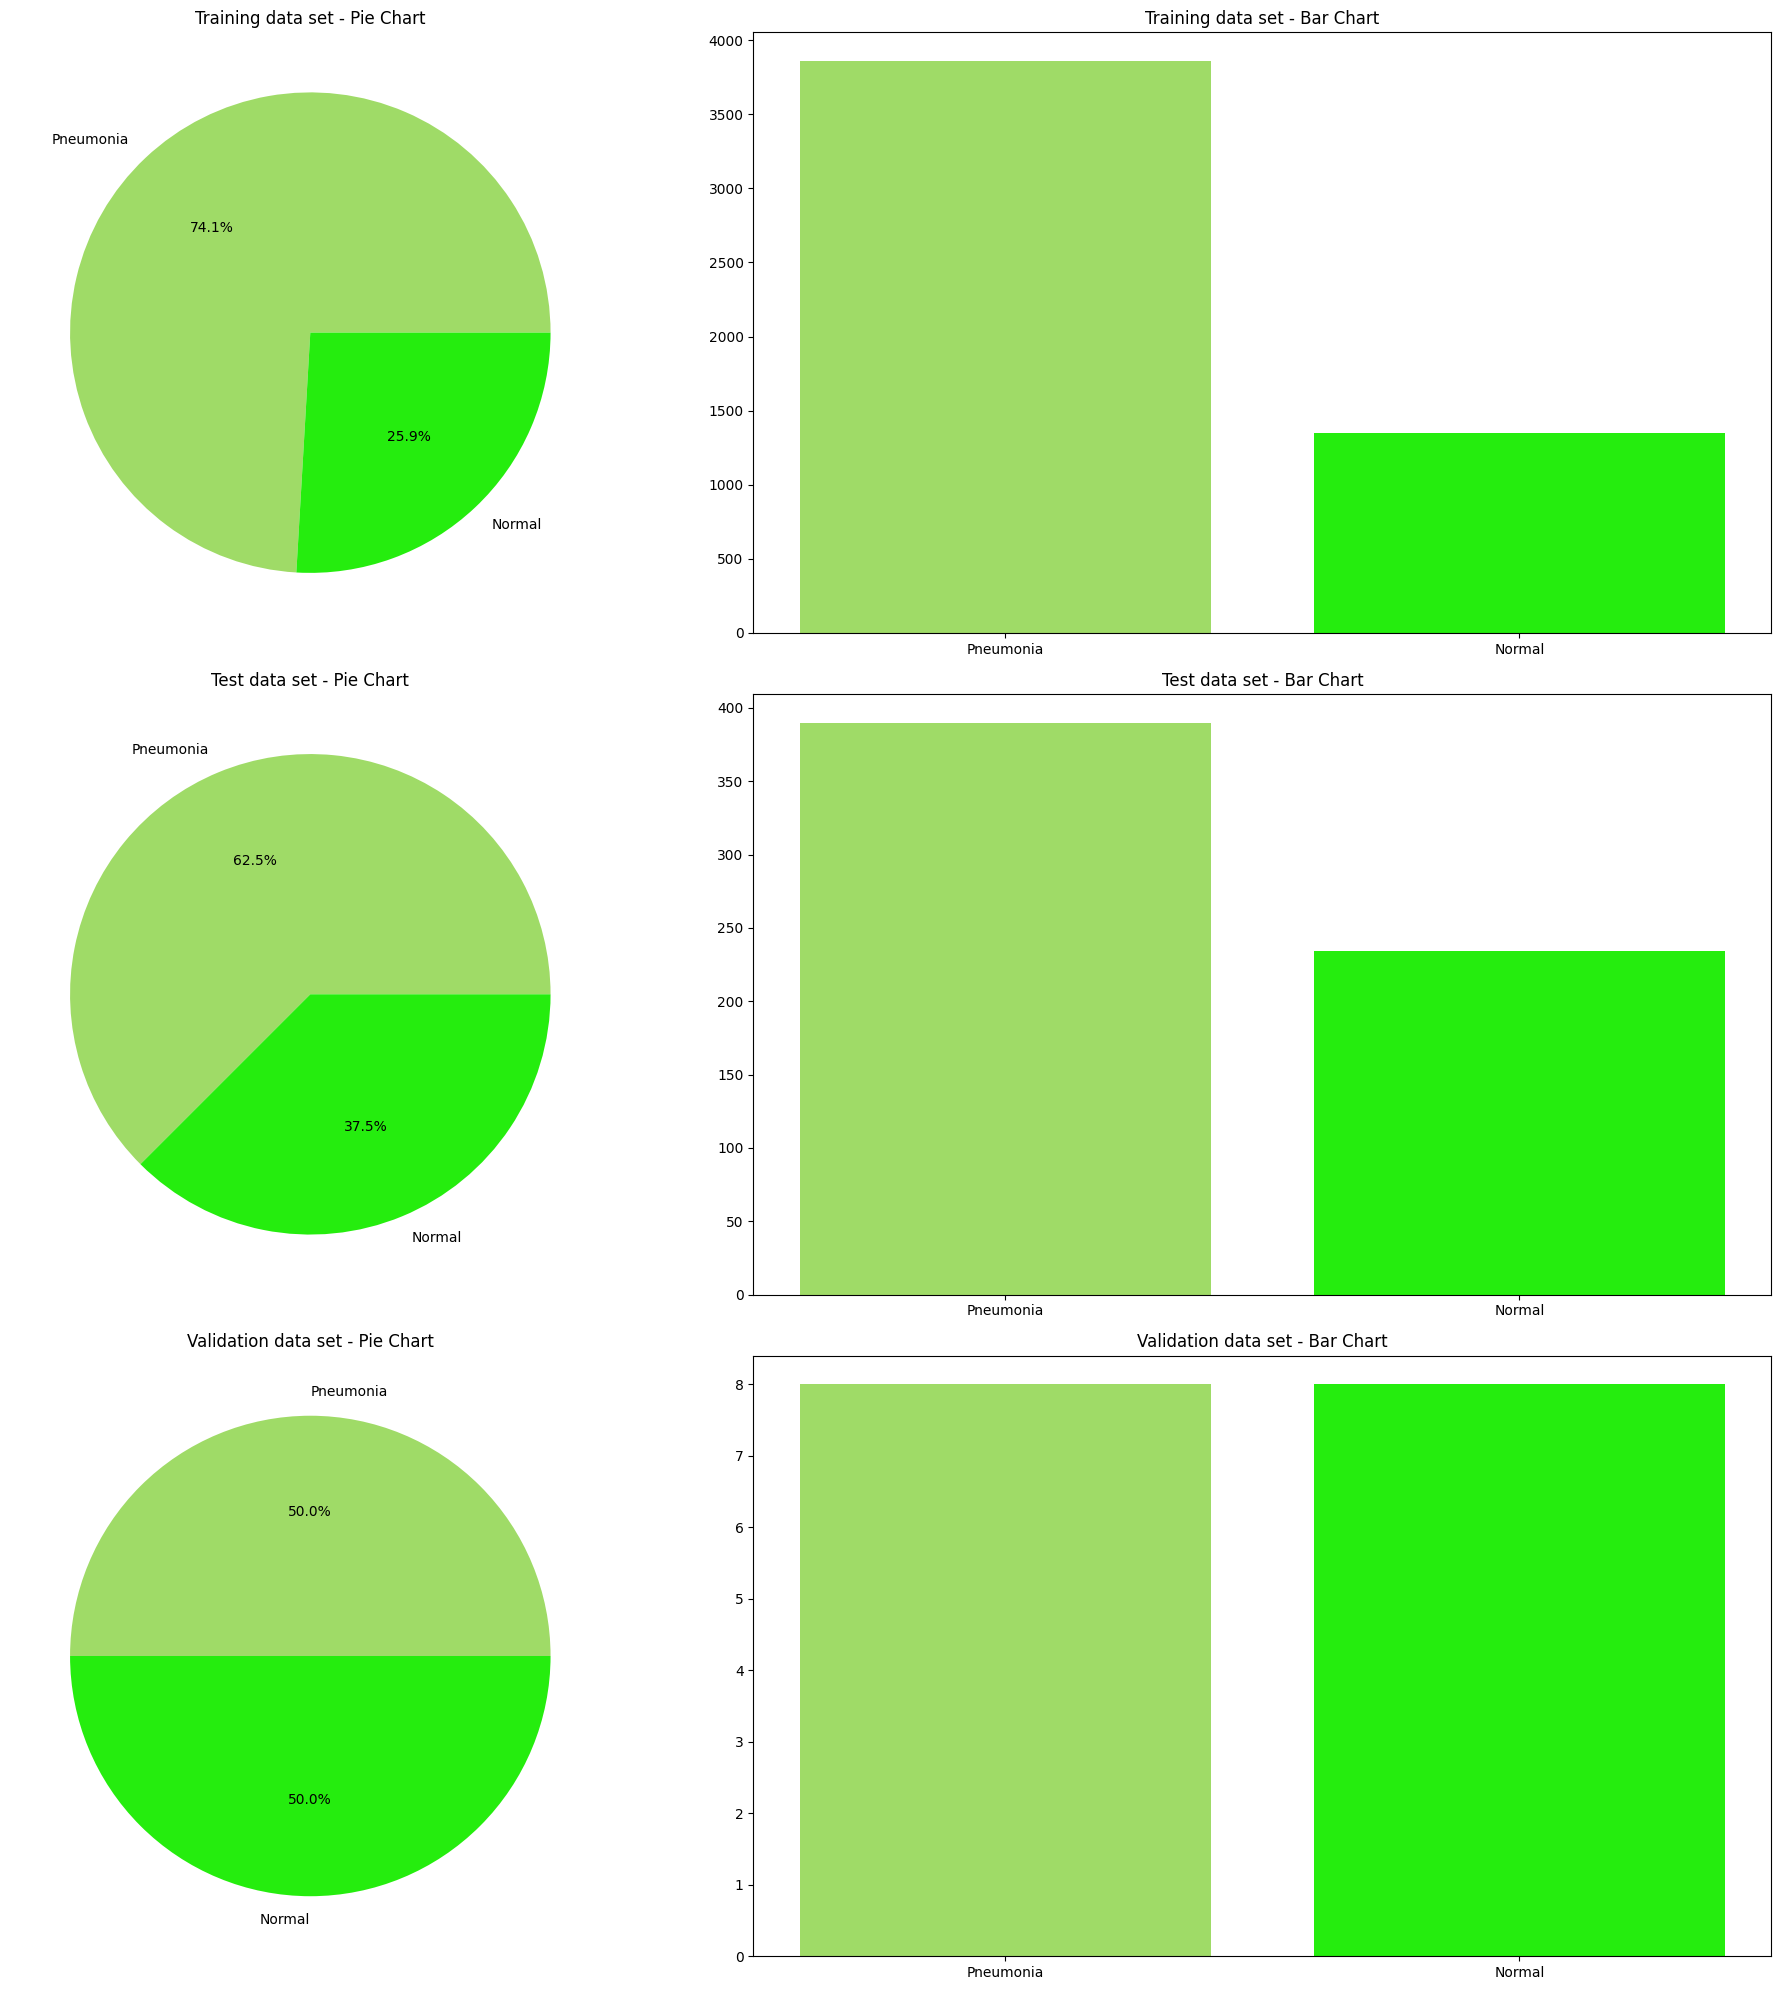

In [ ]:
train_folder = '/content/drive/MyDrive/chest_xray/train'
test_folder = '/content/drive/MyDrive/chest_xray/test'
val_folder = '/content/drive/MyDrive/chest_xray/val'

#  number of images in each class for each dataset
train_pneumonia_count = len(os.listdir(train_folder + "/PNEUMONIA"))
train_normal_count = len(os.listdir(train_folder + "/NORMAL"))

test_pneumonia_count = len(os.listdir(test_folder + "/PNEUMONIA"))
test_normal_count = len(os.listdir(test_folder + "/NORMAL"))

val_pneumonia_count = len(os.listdir(val_folder + "/PNEUMONIA"))
val_normal_count = len(os.listdir(val_folder + "/NORMAL"))


train_data = [train_pneumonia_count, train_normal_count]
test_data = [test_pneumonia_count, test_normal_count]
val_data = [val_pneumonia_count, val_normal_count]
# Labels
labels = ['Pneumonia', 'Normal']

#  subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

#  pie charts
colors_pie = ['#9fdb67', '#25ed0e']
colors_bar = ['#9fdb67', '#25ed0e']

axes[0, 0].pie(train_data, labels=labels, autopct='%1.1f%%', colors=colors_pie)
axes[0, 0].set_title('Training data set - Pie Chart')

axes[0, 1].bar(labels, train_data, color=colors_bar)
axes[0, 1].set_title('Training data set - Bar Chart')

axes[1, 0].pie(test_data, labels=labels, autopct='%1.1f%%', colors=colors_pie)
axes[1, 0].set_title('Test data set - Pie Chart')

axes[1, 1].bar(labels, test_data, color=colors_bar)
axes[1, 1].set_title('Test data set - Bar Chart')

axes[2, 0].pie(val_data, labels=labels, autopct='%1.1f%%', colors=colors_pie)
axes[2, 0].set_title('Validation data set - Pie Chart')

axes[2, 1].bar(labels, val_data, color=colors_bar)
axes[2, 1].set_title('Validation data set - Bar Chart')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generator
train_datagen = ImageDataGenerator(rescale=1./255)

# Specify the directory for the training dataset
train_dir = '/content/drive/MyDrive/chest_xray/train'  # Update this path

# Create the training data generator
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Dictionary mapping class names to their corresponding index
train_dict = train_gen.class_indices

# Extracting class names from the dictionary
classes = list(train_dict.keys())


Found 5211 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_gen, epochs=3)  # Adjust epochs as needed

# Save the model
model.save('pneumonia_model.h5')


Epoch 1/3
163/163 [==============================] - 641s 3s/step - loss: 0.3281 - accuracy: 0.8676
Epoch 2/3
163/163 [==============================] - 356s 2s/step - loss: 0.1475 - accuracy: 0.9457
Epoch 3/3
163/163 [==============================] - 348s 2s/step - loss: 0.1185 - accuracy: 0.9591


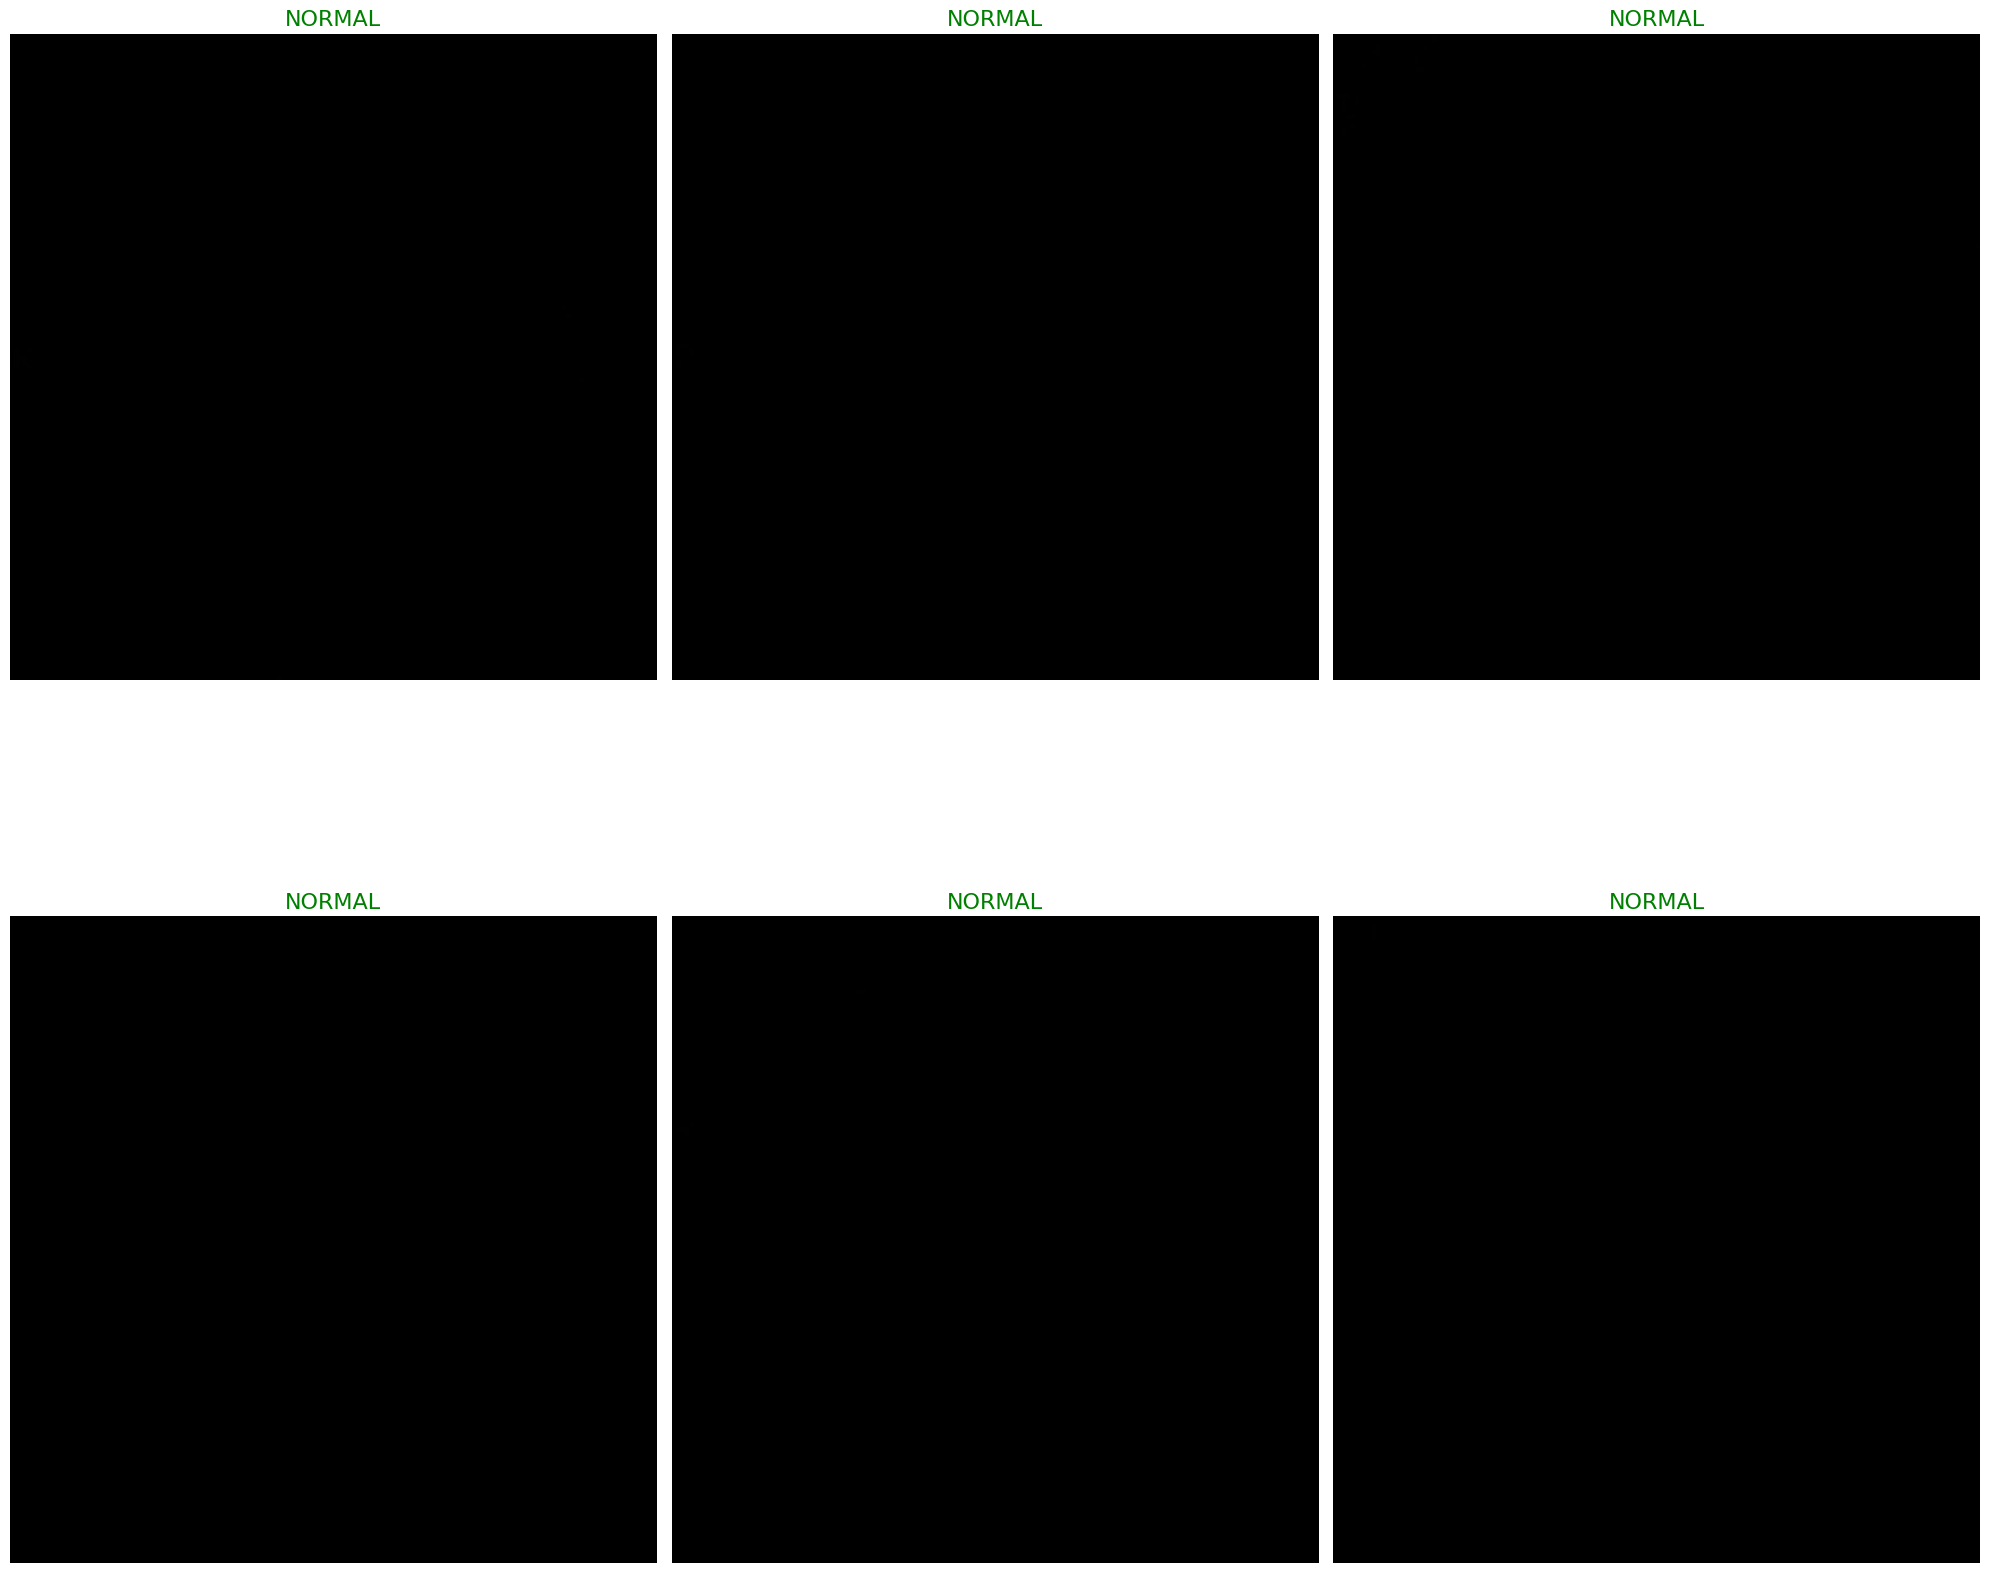

In [ ]:
# Traing images
train_dict = train_gen.class_indices

# Extracting class names ----> train_dict dictionary
classes = list(train_dict.keys())

# next batch ---> of images and labels from train_gen
images, labels = next(train_gen)

# Visualization----> parameters
num_images_to_display = 6
images_per_row = 3
num_rows = num_images_to_display // images_per_row

# P---> images
plt.figure(figsize=(20, 20))

for i in range(num_images_to_display):
    plt.subplot(num_rows, images_per_row, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='green', fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Define the data generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Specify the directory for the test dataset
test_dir = '/content/drive/MyDrive/chest_xray/test'  # Update this path

# Create the test data generator
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 624 images belonging to 2 classes.


In [ ]:
# Load the trained model
model = load_model('pneumonia_model.h5')


1/1 [==============================] - 0s 69ms/step


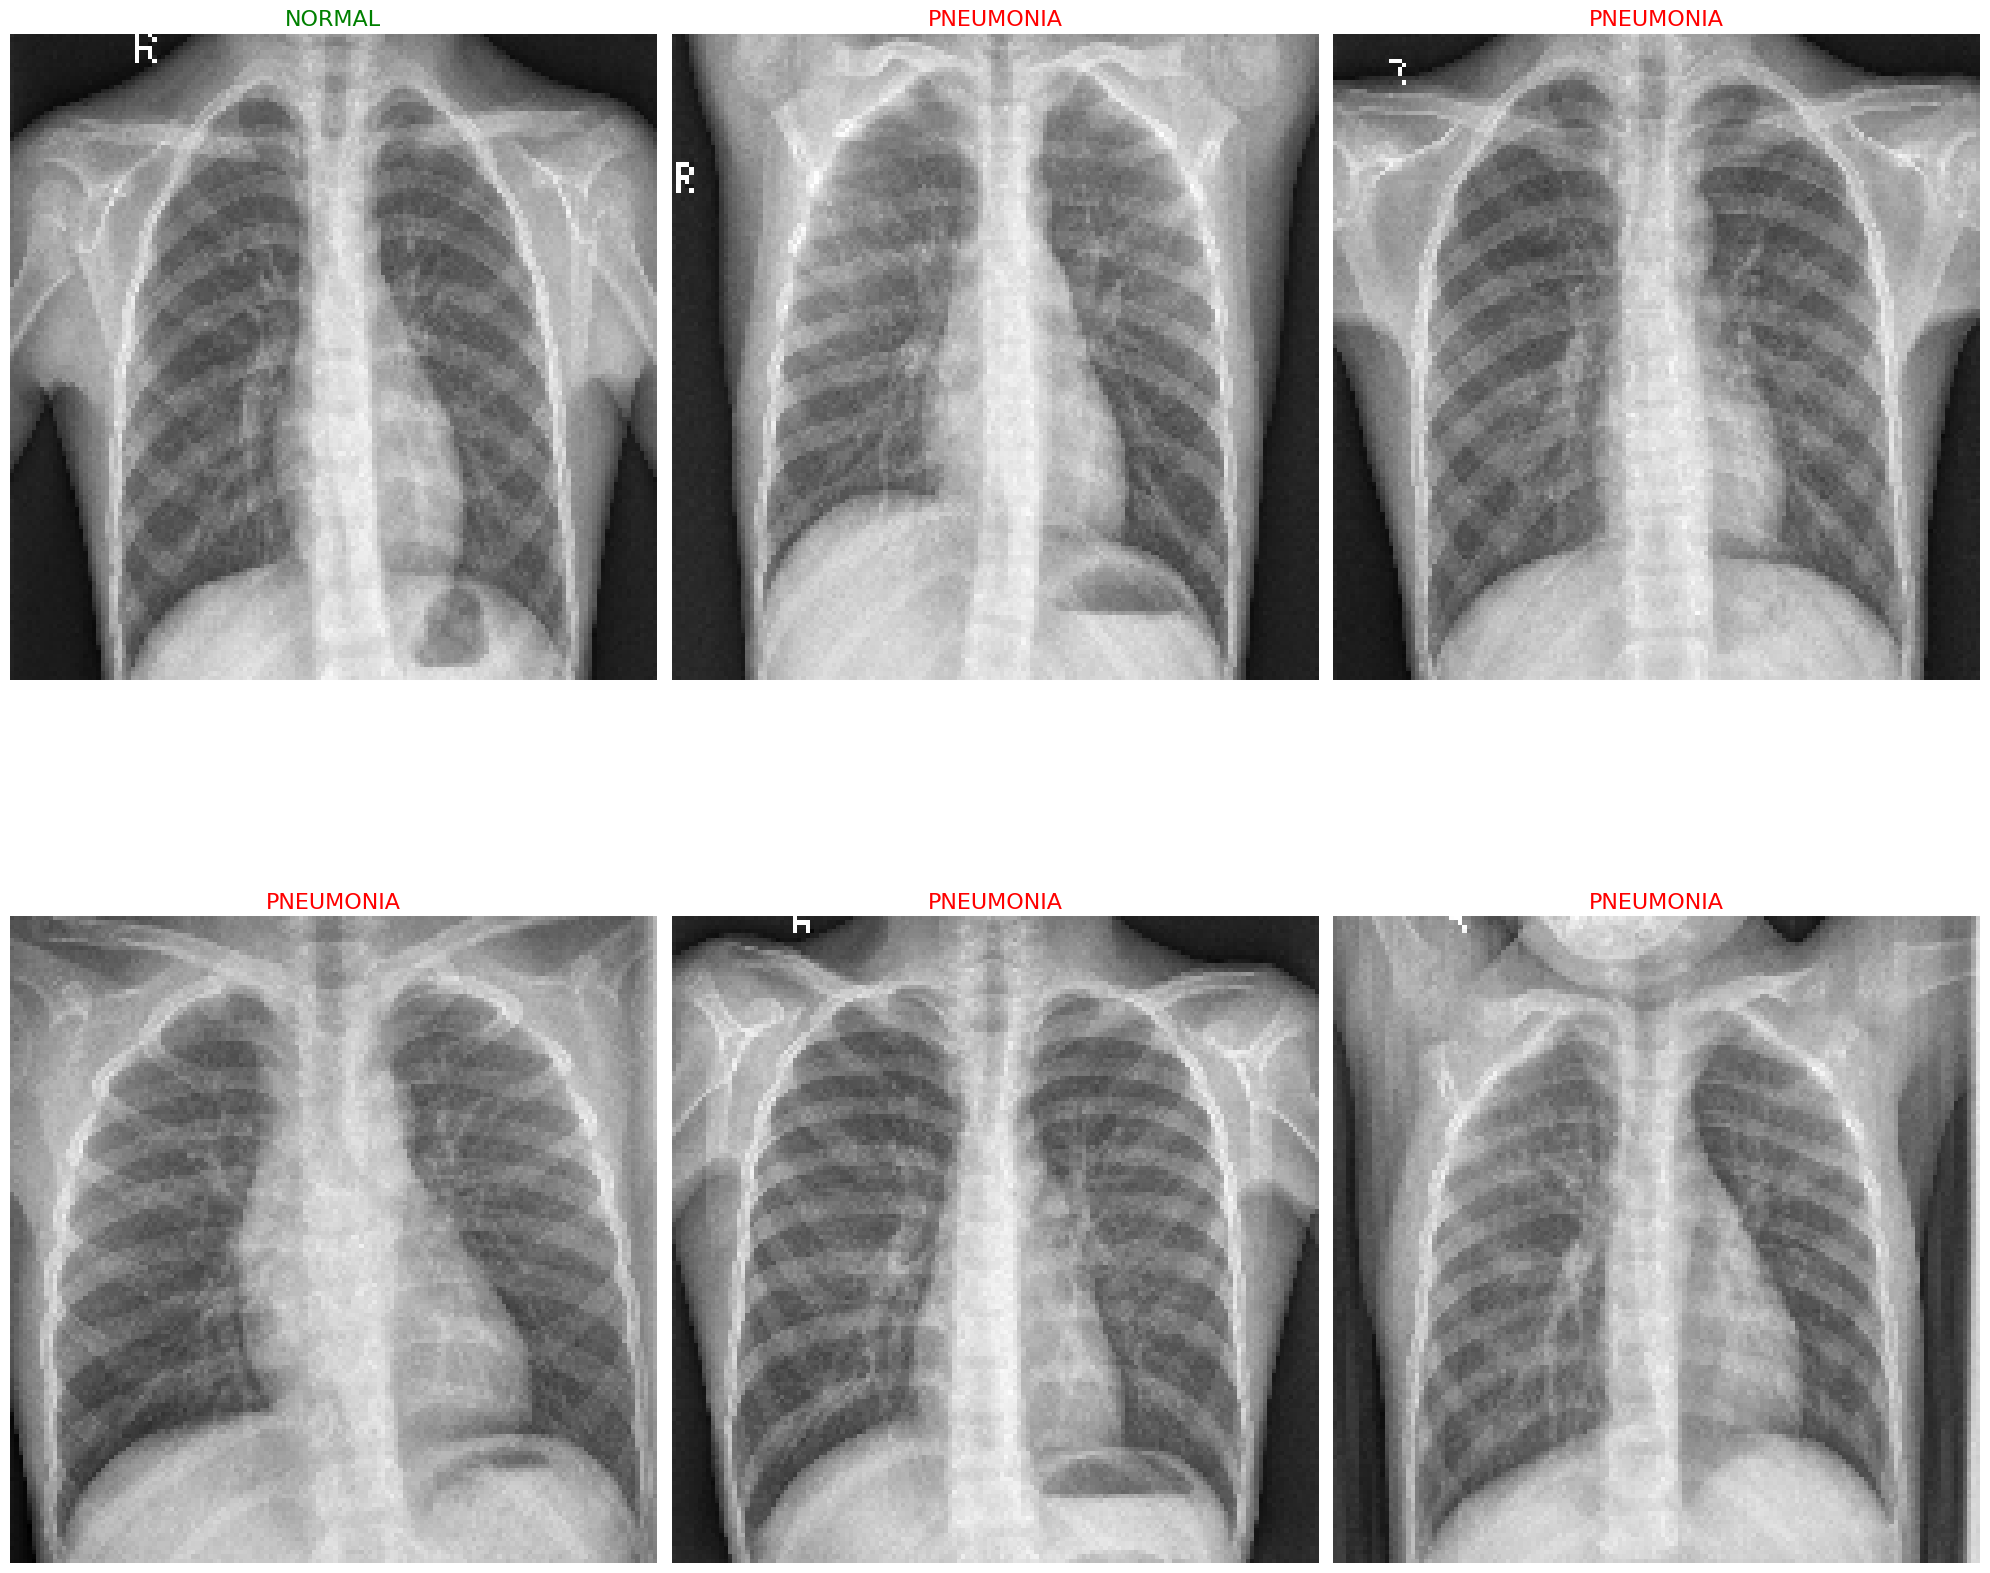

In [ ]:
# Get class indices from the test generator
test_dict = test_gen.class_indices

# Extract class names from the dictionary
classes = list(test_dict.keys())

# Get the next batch of images and labels from the test generator
images, labels = next(test_gen)

# Visualization parameters
num_images_to_display = 6
images_per_row = 3
num_rows = num_images_to_display // images_per_row

# Plot the images
plt.figure(figsize=(20, 20))

for i in range(num_images_to_display):
    plt.subplot(num_rows, images_per_row, i + 1)
    image = images[i]
    plt.imshow(image)
    prediction = model.predict(np.expand_dims(image, axis=0))
    class_name = classes[int(prediction[0] > 0.5)]
    plt.title(class_name, color='green' if class_name == classes[int(labels[i])] else 'red', fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model


In [ ]:
# Define the data generator for the validation set
valid_datagen = ImageDataGenerator(rescale=1./255)

# Specify the directory for the validation dataset
validation_dir = '/content/drive/MyDrive/chest_xray/val'  # Update this path

# Create the validation data generator
valid_gen = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 16 images belonging to 2 classes.


In [ ]:
# Load the trained model
model = load_model('pneumonia_model.h5')


1/1 [==============================] - 0s 40ms/step


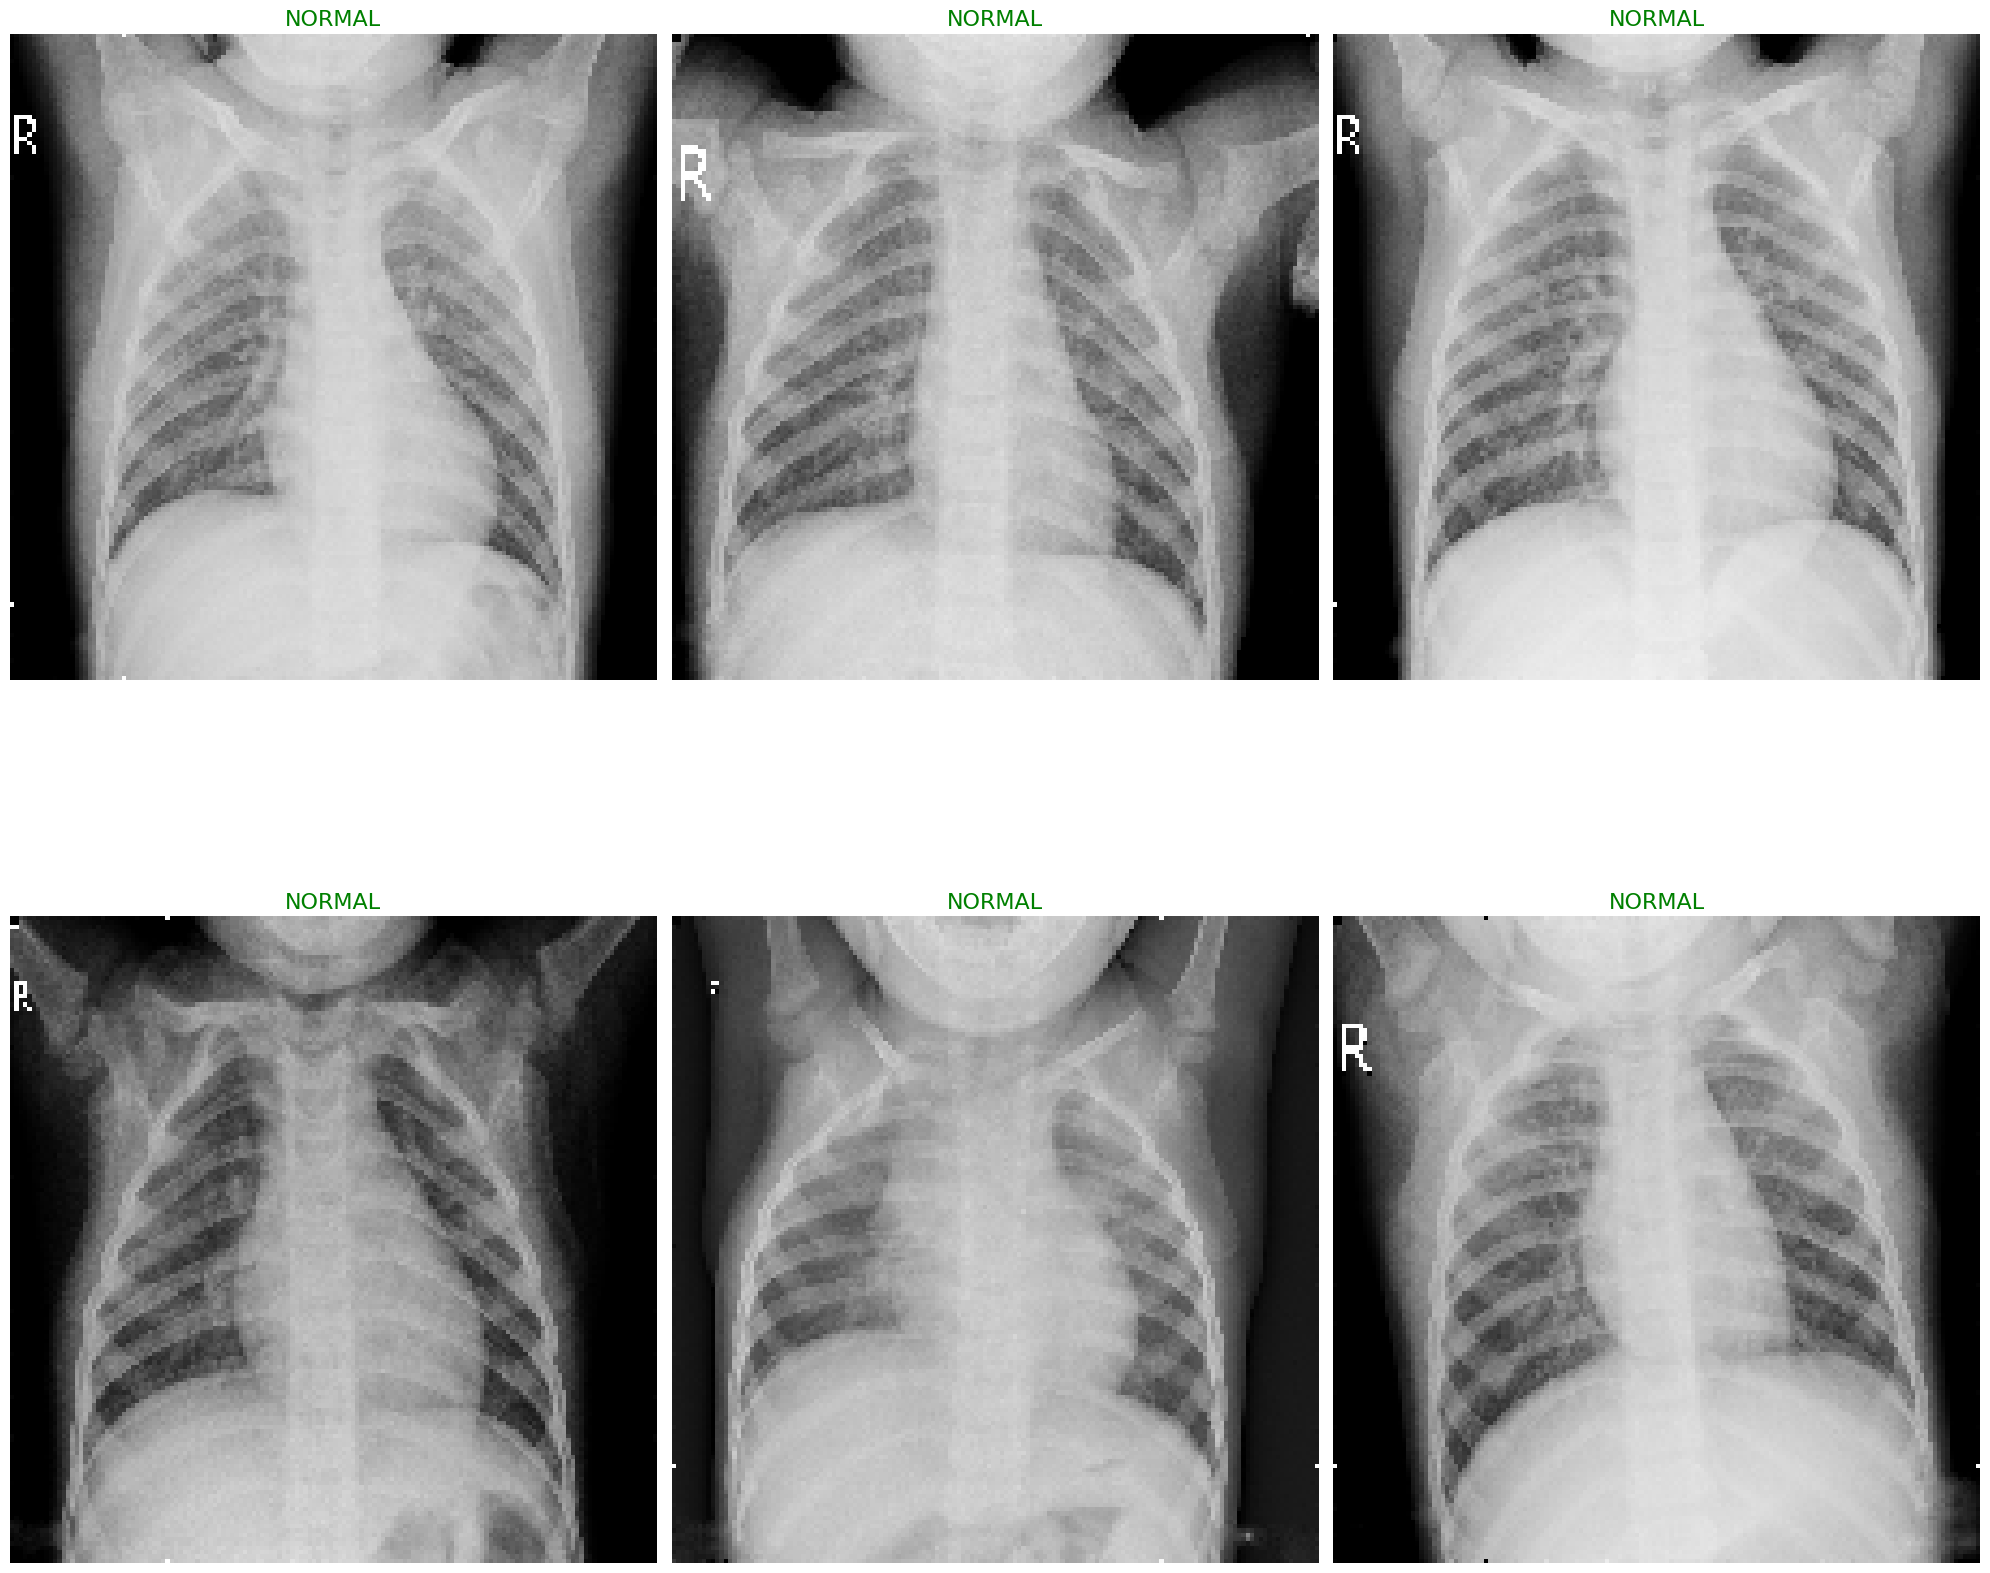

In [ ]:
# Get class indices from the validation generator
valid_dict = valid_gen.class_indices

# Extract class names from the dictionary
classes = list(valid_dict.keys())

# Get the next batch of images and labels from the validation generator
images, labels = next(valid_gen)

# Visualization parameters
num_images_to_display = 6
images_per_row = 3
num_rows = num_images_to_display // images_per_row

# Plot the images
plt.figure(figsize=(20, 20))

for i in range(num_images_to_display):
    plt.subplot(num_rows, images_per_row, i + 1)
    image = images[i]
    plt.imshow(image)
    prediction = model.predict(np.expand_dims(image, axis=0))
    class_name = classes[int(prediction[0] > 0.5)]
    plt.title(class_name, color='green' if class_name == classes[int(labels[i])] else 'red', fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()
